***Problem Statement***

Customer Segmentation Analysis is a comprehensive examination of a company's distinct customer groups. This analysis empowers businesses to gain a deep understanding of their customers, facilitating the customisation of products to align with the unique needs, behaviours, and concerns of different customer segments.

By conducting a Customer Segmentation Analysis, businesses can refine their products based on the preferences and characteristics of specific customer segments. Instead of investing resources in marketing a new product to the entire customer database, a company can identify the most receptive segment and tailor its marketing efforts exclusively to that particular group. This strategic approach ensures a more targeted and efficient use of resources in reaching the most responsive audience.

***Sections of Analysis***
1. Loading data
2. Data Cleaning
3. Exploratory Data Analysis
4. Dimensionality Reduction
5. Clustering Model
6. Evaluation
7. Profiling
8. Conclusion

***Section 1: Loading Data***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('/Users/millieellis/Library/CloudStorage/OneDrive-Personal/Documents/Data/Marketing/marketing_campaign.csv')

***Section 2: Data Cleaning***

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data type transformations

Findings: The Dt_Customer column should be transformed to datetime format

In [3]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed')

df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


Clean up column names

In [4]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

Checking for percentage of missing values for each field

In [5]:
# Calculate percentage of null values for each field
null_percentage = (df.isnull().mean() * 100).round(2)

# Display the result
print(null_percentage)

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64


There are missing values in income - 1.07% of income rows are null. I am going to drop the rows that have missing values for income.

In [6]:
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2216


***Section 3: Exploratory Data Analysis***

Detect features with outliers:

Observations: Numerous features exhibit outliers, as evident from the boxplots below. However, the sole feature that likely signifies data entry errors is Year_Birth with values less than or equal to 1900.

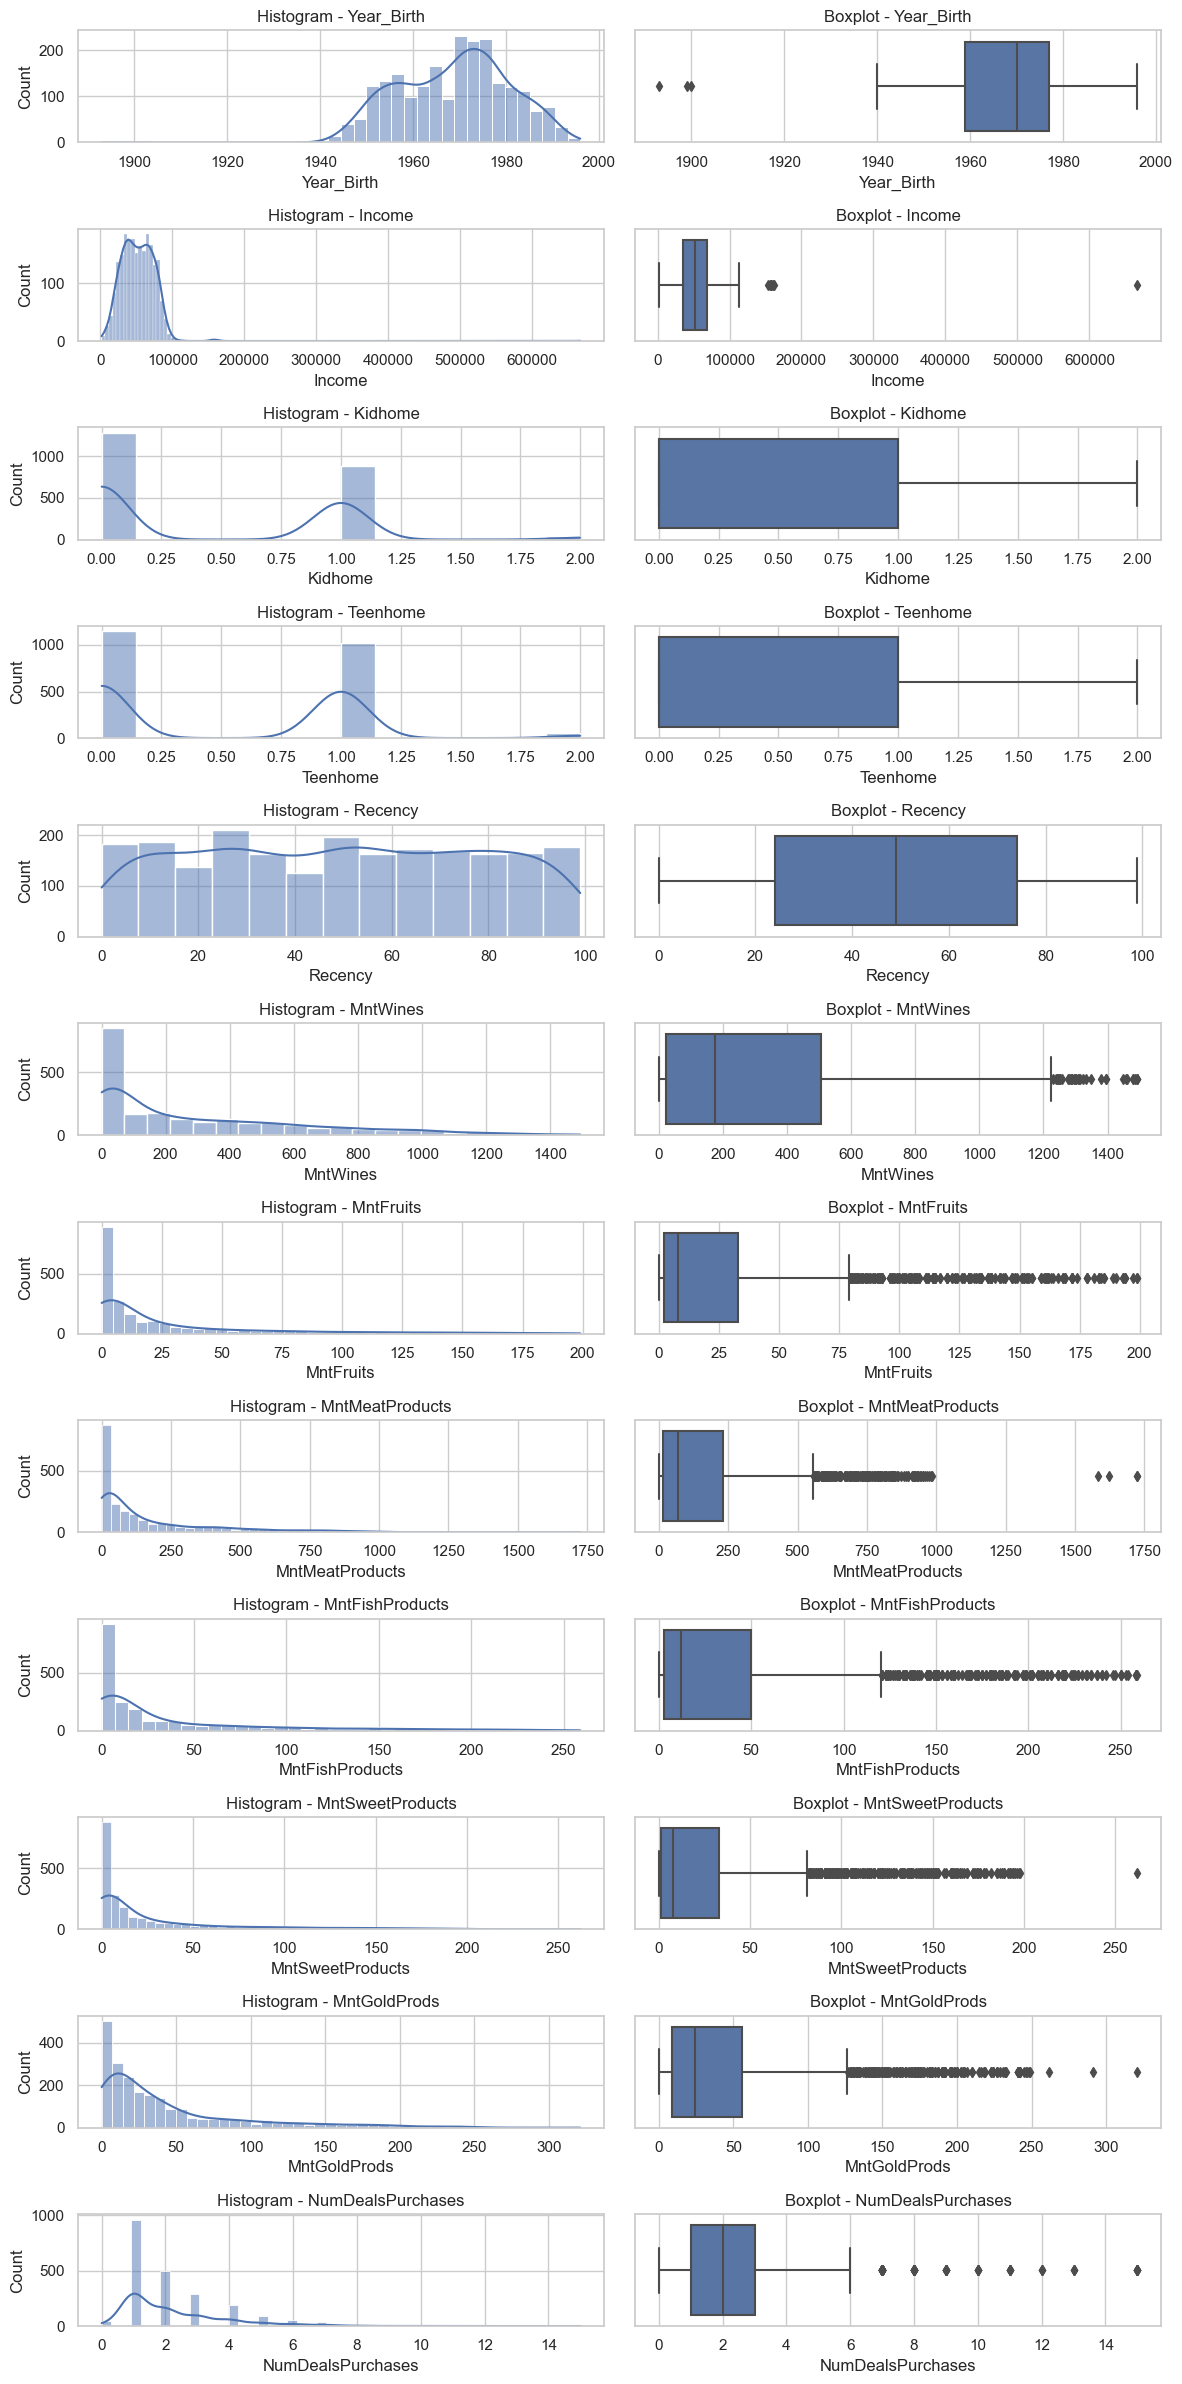

In [7]:
# Select columns
columns_to_visualise = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number).columns[:12]

# Set seaborn style
sns.set(style="whitegrid")

# Set up the subplots with a smaller height
fig, axes = plt.subplots(nrows=len(columns_to_visualise), ncols=2, figsize=(12, 2 * len(columns_to_visualise)))

# Plot data distribution for each column
for i, column in enumerate(columns_to_visualise):
    # Histogram
    sns.histplot(df[column], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram - {column}')
    
    # Boxplot
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

From review of the plots above it looks like we have outliers for year_of_birth and income

I am going to remove rows where Year_Birth <= 1900 and income > 600000

Histogram and boxplot below to show a much better distribution

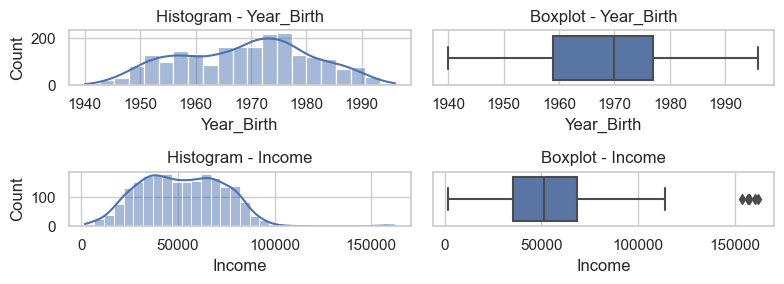

In [8]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)
df = df[df['Income'] < 600000].reset_index(drop=True)

# Set seaborn style
sns.set(style="whitegrid")

# Set up the subplots with a smaller height
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 3))

# Histogram for Year_Birth
sns.histplot(df['Year_Birth'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Histogram - Year_Birth')

# Boxplot for Year_Birth
sns.boxplot(x=df['Year_Birth'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot - Year_Birth')

# Histogram for Income
sns.histplot(df['Income'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Histogram - Income')

# Boxplot for Income
sns.boxplot(x=df['Income'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot - Income')

# Adjust layout
plt.tight_layout()
plt.show()

Feature Engineering

Useful variables that can be engineered with the given data:

- Customer_For: The number of days being a customer can be engineered from 'Dt_Customer' - representing the number of days the customer started to shop in the store relative to the last recorded date

- Age: Extract the age of a customer by the "Year_Birth" indicating the birth year of the respective person.

- Dependents: The total number of dependents in the home can be engineered from the sum of 'Kidhome' and 'Teenhome'

- Total Spent: The total amount spent indicating the total amount spent by the customer in various categories over the span of two years - can be engineered from the sum of all features containing the keyword 'Mnt'

- Total_Purchases: The total purchases can be engineered from the sum of all features containing the keyword 'Purchases'

- Total_Campaigns_Acc: The total number of campains accepted can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

- Is_Parent: To indicate parenthood status

- Education: Reduce categories to three by simplifying its value counts

- Dropping some of the redundant features


In [9]:
#Feature Engineering

# Customer_For
# Calculate the difference in days
df['Customer_For'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

# Age 
df["Age"] = 2021-df["Year_Birth"]

# Dependents
df["Dependents"]=df["Kidhome"]+df["Teenhome"]

# Total Spent
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['Total_Purchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df['Total_Campaigns_Acc'] = df[campaigns_cols].sum(axis=1)

# Is Parent
df["Is_Parent"] = np.where(df.Dependents> 0, 1, 0)

# Education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Clarify column names
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# Drop redundant features
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

***Section 4: Clustering***

Should the data be scaled?

In [10]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Dependents,Total_Spent,Total_Purchases,Total_Campaigns_Acc,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,0.013562,0.009042,0.150542,512.144213,52.086347,0.947559,607.268083,14.891501,0.448915,0.714286
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,0.115691,0.094678,0.357683,232.551465,11.701599,0.749466,602.513364,7.671629,0.893017,0.451856
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,340.000000,44.000000,0.000000,69.000000,8.000000,0.000000,0.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,513.000000,51.000000,1.000000,397.000000,15.000000,0.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,686.000000,62.000000,1.000000,1048.000000,21.000000,1.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1063.000000,81.000000,3.000000,2525.000000,44.000000,5.000000,1.000000


Scaling the data is important in this case due to the varying scales and magnitudes of the variables.

The above variables have different ranges and magnitudes. Variables with larger scales and magnitudes may have a greater influence on the overall clustering results.

Scaling the data helps to bring all the variables to a similar scale, making them comparable and ensuring that no variable dominates the clustering process solely based on its larger scale. It helps in removing the bias introduced by variables with larger magnitudes, allowing all variables to contribute equally to the clustering algorithm.

Therefore, scaling the data in this case would be beneficial to ensure fair and accurate clustering results.

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns in df
numerical_columns = df.select_dtypes(include=np.number).columns
numerical_columns = [col for col in numerical_columns]

# Scale the numerical columns using Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)

***Section 4: Dimensionality Reduction***

In addressing this problem, the classification process relies on numerous factors, which are essentially attributes or features. Dealing with a large number of features can be challenging, particularly when many of them are correlated and, therefore, redundant. To enhance efficiency, I will undertake dimensionality reduction on the selected features before subjecting them to a classifier.

Dimensionality reduction involves reducing the number of considered random variables, aiming to derive a set of principal variables.

Principal Component Analysis (PCA) serves as a technique for diminishing the dimensionality of datasets. Its objective is to increase interpretability while simultaneously minimising the loss of information.

Principal component analysis (PCA)

In [12]:
from sklearn.decomposition import PCA

# PCA to reduce dimentions (features) to 3
pca = PCA(n_components=3)
pca.fit(df_scaled)
PCA_dims = pd.DataFrame(pca.transform(df_scaled), columns=(["dim1","dim2", "dim3"]))
PCA_dims.describe().T

,count,mean,std,min,25%,50%,75%,max
dim1,2212.0,2.569775e-17,0.687175,-1.026928,-0.559260,-0.215406,0.414301,2.066261
dim2,2212.0,1.445498e-17,0.421761,-0.993966,-0.317547,0.006594,0.283269,1.617715
dim3,2212.0,-1.626186e-17,0.406066,-0.979653,-0.301923,-0.025843,0.215014,1.346395


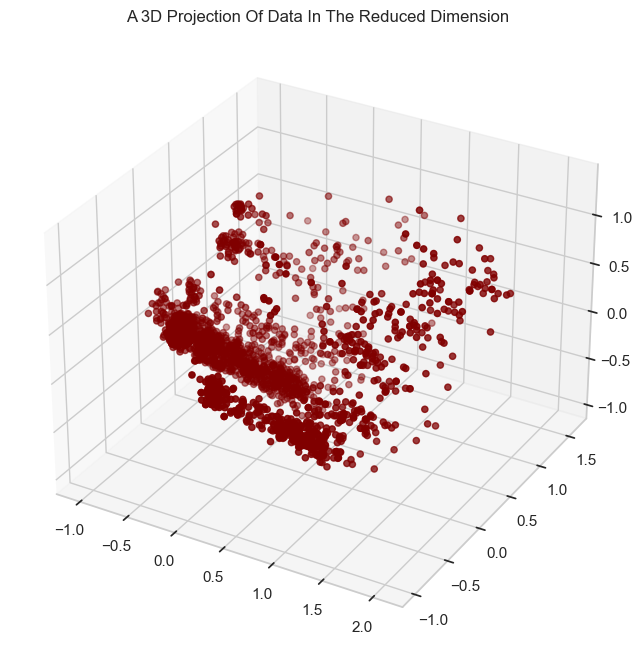

In [13]:
# 3D Projection Of Data In The Reduced Dimension
x=PCA_dims["dim1"]
y=PCA_dims["dim2"]
z=PCA_dims["dim3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

***Section 5: Clustering Model***

The clustering approach employed is Agglomerative Clustering, a hierarchical method that entails merging instances until the desired number of clusters is reached.

The clustering process involves the following steps:

1. Elbow Method: Employed to ascertain the optimal number of clusters to be formed.

2. Agglomerative Clustering: Utilised for the formation of clusters, involving the iterative merging of examples.

3. Cluster Examination: The formed clusters are then examined and visualised through a scatter plot.

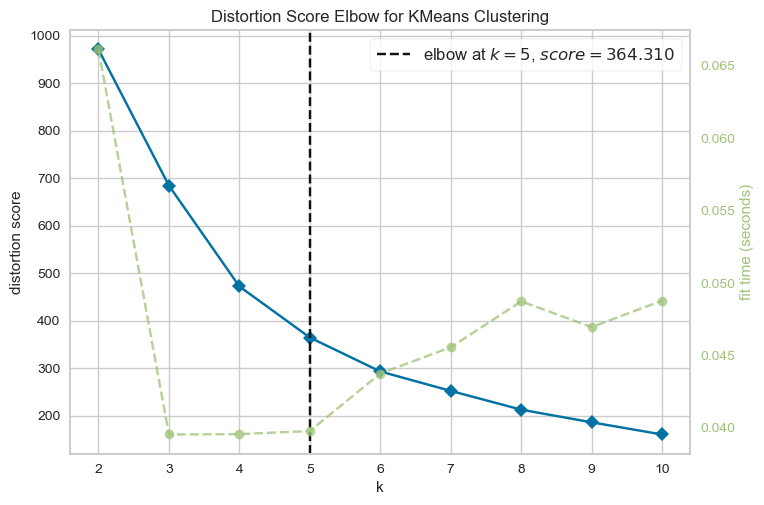

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Elbow method to find numbers of clusters to make
Elbow_M = KElbowVisualizer(KMeans(), k=10, figsize=(4, 3))
Elbow_M.fit(PCA_dims)
Elbow_M.show()

Above chart indicates that 5 will be a good number of clusters for this analysis.

Agglomerative Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)

# Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_dims)
PCA_dims["Cluster_Label"] = yhat_AC

#Adding the Cluster_Label feature to the orignal dataframe.
df["Cluster_Label"]= yhat_AC

Now to examine the clusters in 3D

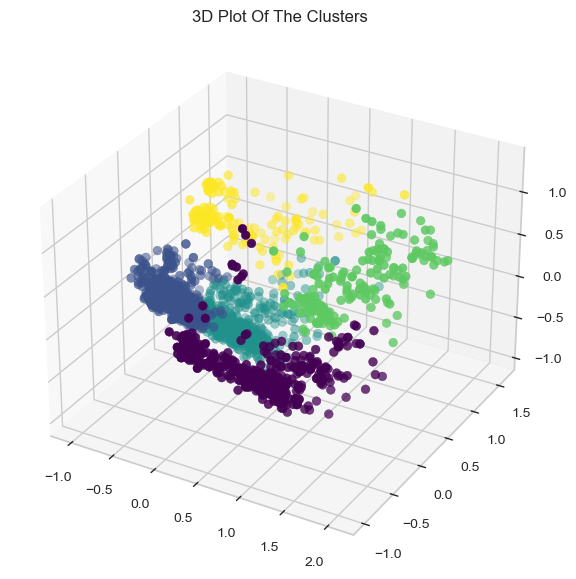

In [16]:
# Define a colormap
num_clusters = 5
cmap = plt.cm.get_cmap('viridis', num_clusters)

# Plotting the clusters
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_dims["Cluster_Label"], marker='o', cmap=cmap)

ax.set_title("3D Plot Of The Clusters")
plt.show()

In [17]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,Complain,Response,Customer_For,Age,Dependents,Total_Spent,Total_Purchases,Total_Campaigns_Acc,Is_Parent,Cluster_Label
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,0,1,971,64,0,1617,25,1,0,3
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,0,0,125,67,2,27,6,0,1,1
2,Graduate,Together,71613.0,0,0,26,426,49,127,111,...,0,0,472,56,0,776,21,0,0,0
3,Graduate,Together,26646.0,1,0,26,11,4,20,10,...,0,0,65,37,1,53,8,0,1,1
4,Postgraduate,Married,58293.0,1,0,94,173,43,118,46,...,0,0,321,40,1,422,19,0,1,1


***Section 6: Evaulation***

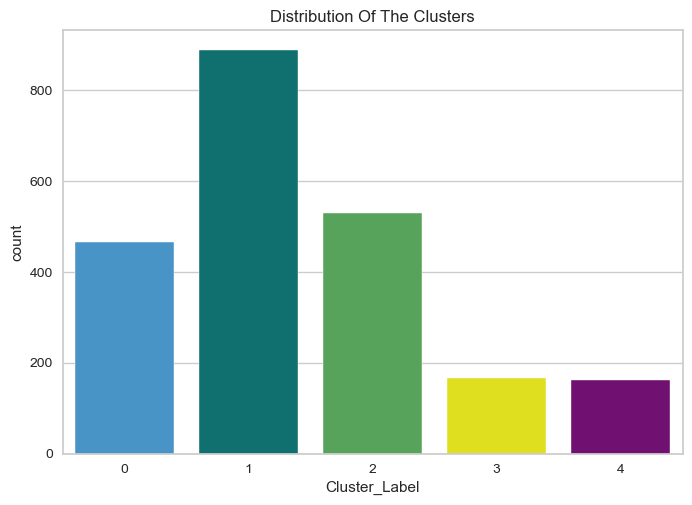

In [18]:
#Plotting countplot of clusters
colours = ["#3498db", "#008080", "#4CAF50", "#FFFF00", "#800080"]
pl = sns.countplot(x=df["Cluster_Label"], palette=colours)
pl.set_title("Distribution Of The Clusters")
plt.show()

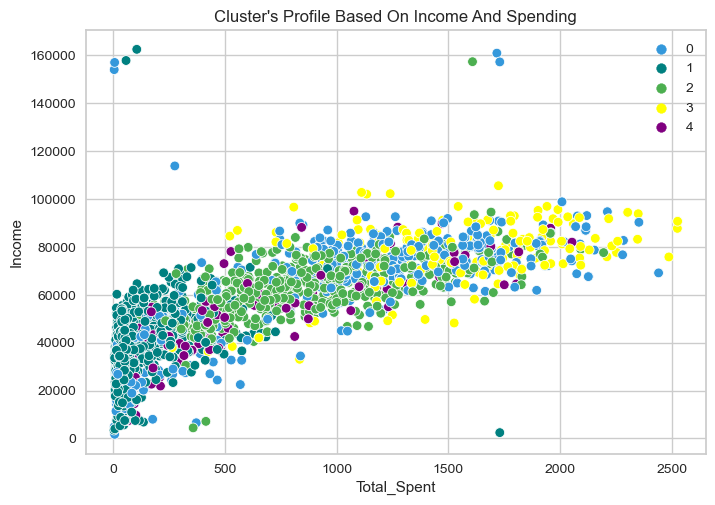

In [19]:
pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["Cluster_Label"], palette=colours)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

- Cluster 0: average-high spending & average-high income
- Cluster 1: low spending & low-average income
- Cluster 2: low-average spending & average income
- Cluster 3: high spending & high income
- Cluster 4: average-high spending and high income

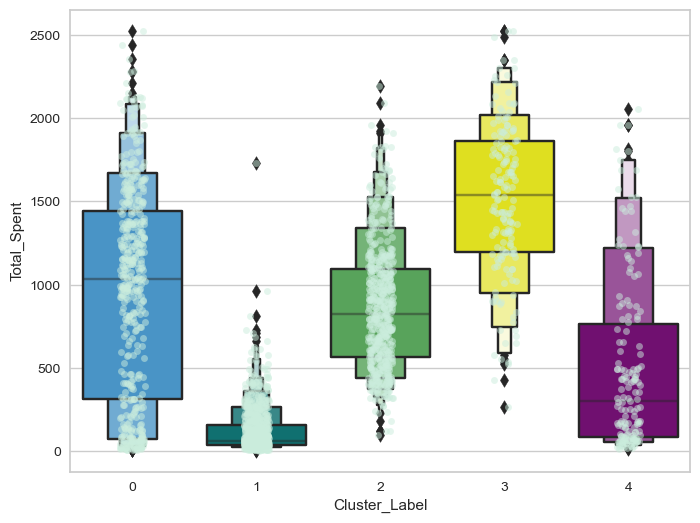

In [20]:
plt.figure(figsize=(8, 6))

# Stripplot
pl = sns.stripplot(x=df["Cluster_Label"], y=df["Total_Spent"], color="#CBEDDD", alpha=0.5)

# Boxenplot
pl = sns.boxenplot(x=df["Cluster_Label"], y=df["Total_Spent"], palette=colours)

plt.show()

From the above plot, it can be clearly seen that cluster 1 and 3 are our biggest set of customers. Cluster 2 is our smallest set of customers. We can explore what each cluster is spending on for the targeted marketing strategies.

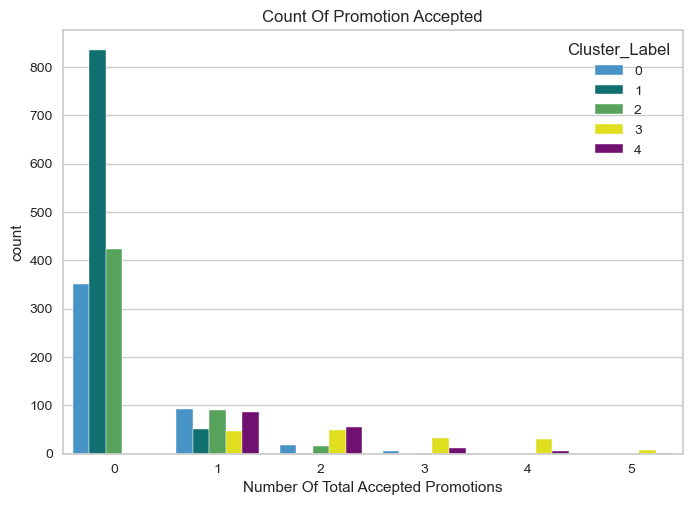

In [21]:
# Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Campaigns_Acc"],hue=df["Cluster_Label"], palette=colours)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

The lack of an overwhelming response to the campaigns, with very few participants overall and none participating in all five, indicates the need for more targeted and well-planned campaigns to boost sales. Despite the chart not reflecting a positive response to the campaigns, this insight highlights the importance of implementing more effective strategies to enhance overall sales performance.

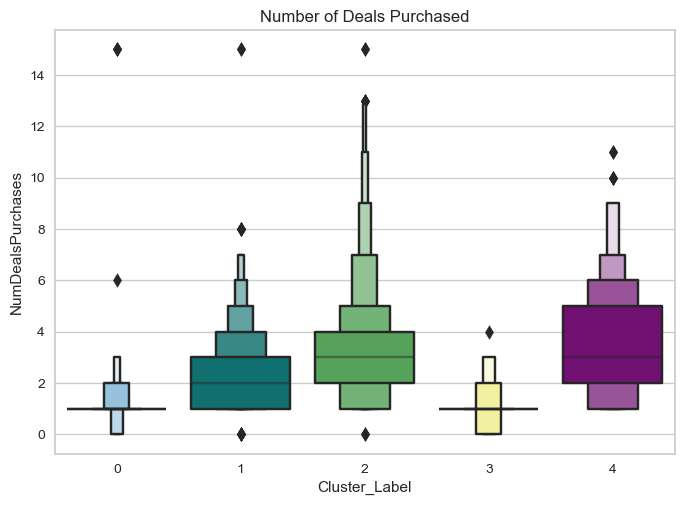

In [22]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Cluster_Label"], palette=colours)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 2, followed by cluster 4. However, our big spend customers in cluster 0 and 3 are not much into the deals.

****Visualising relationship between clusters and fields****

Visualising the cluster distribution through box plots provides valuable insights into the characteristics of each cluster, aiding in the formulation of targeted strategies for different account groups. This approach allows for a comprehensive understanding of how variables vary across clusters, guiding strategic decisions tailored to each group. 

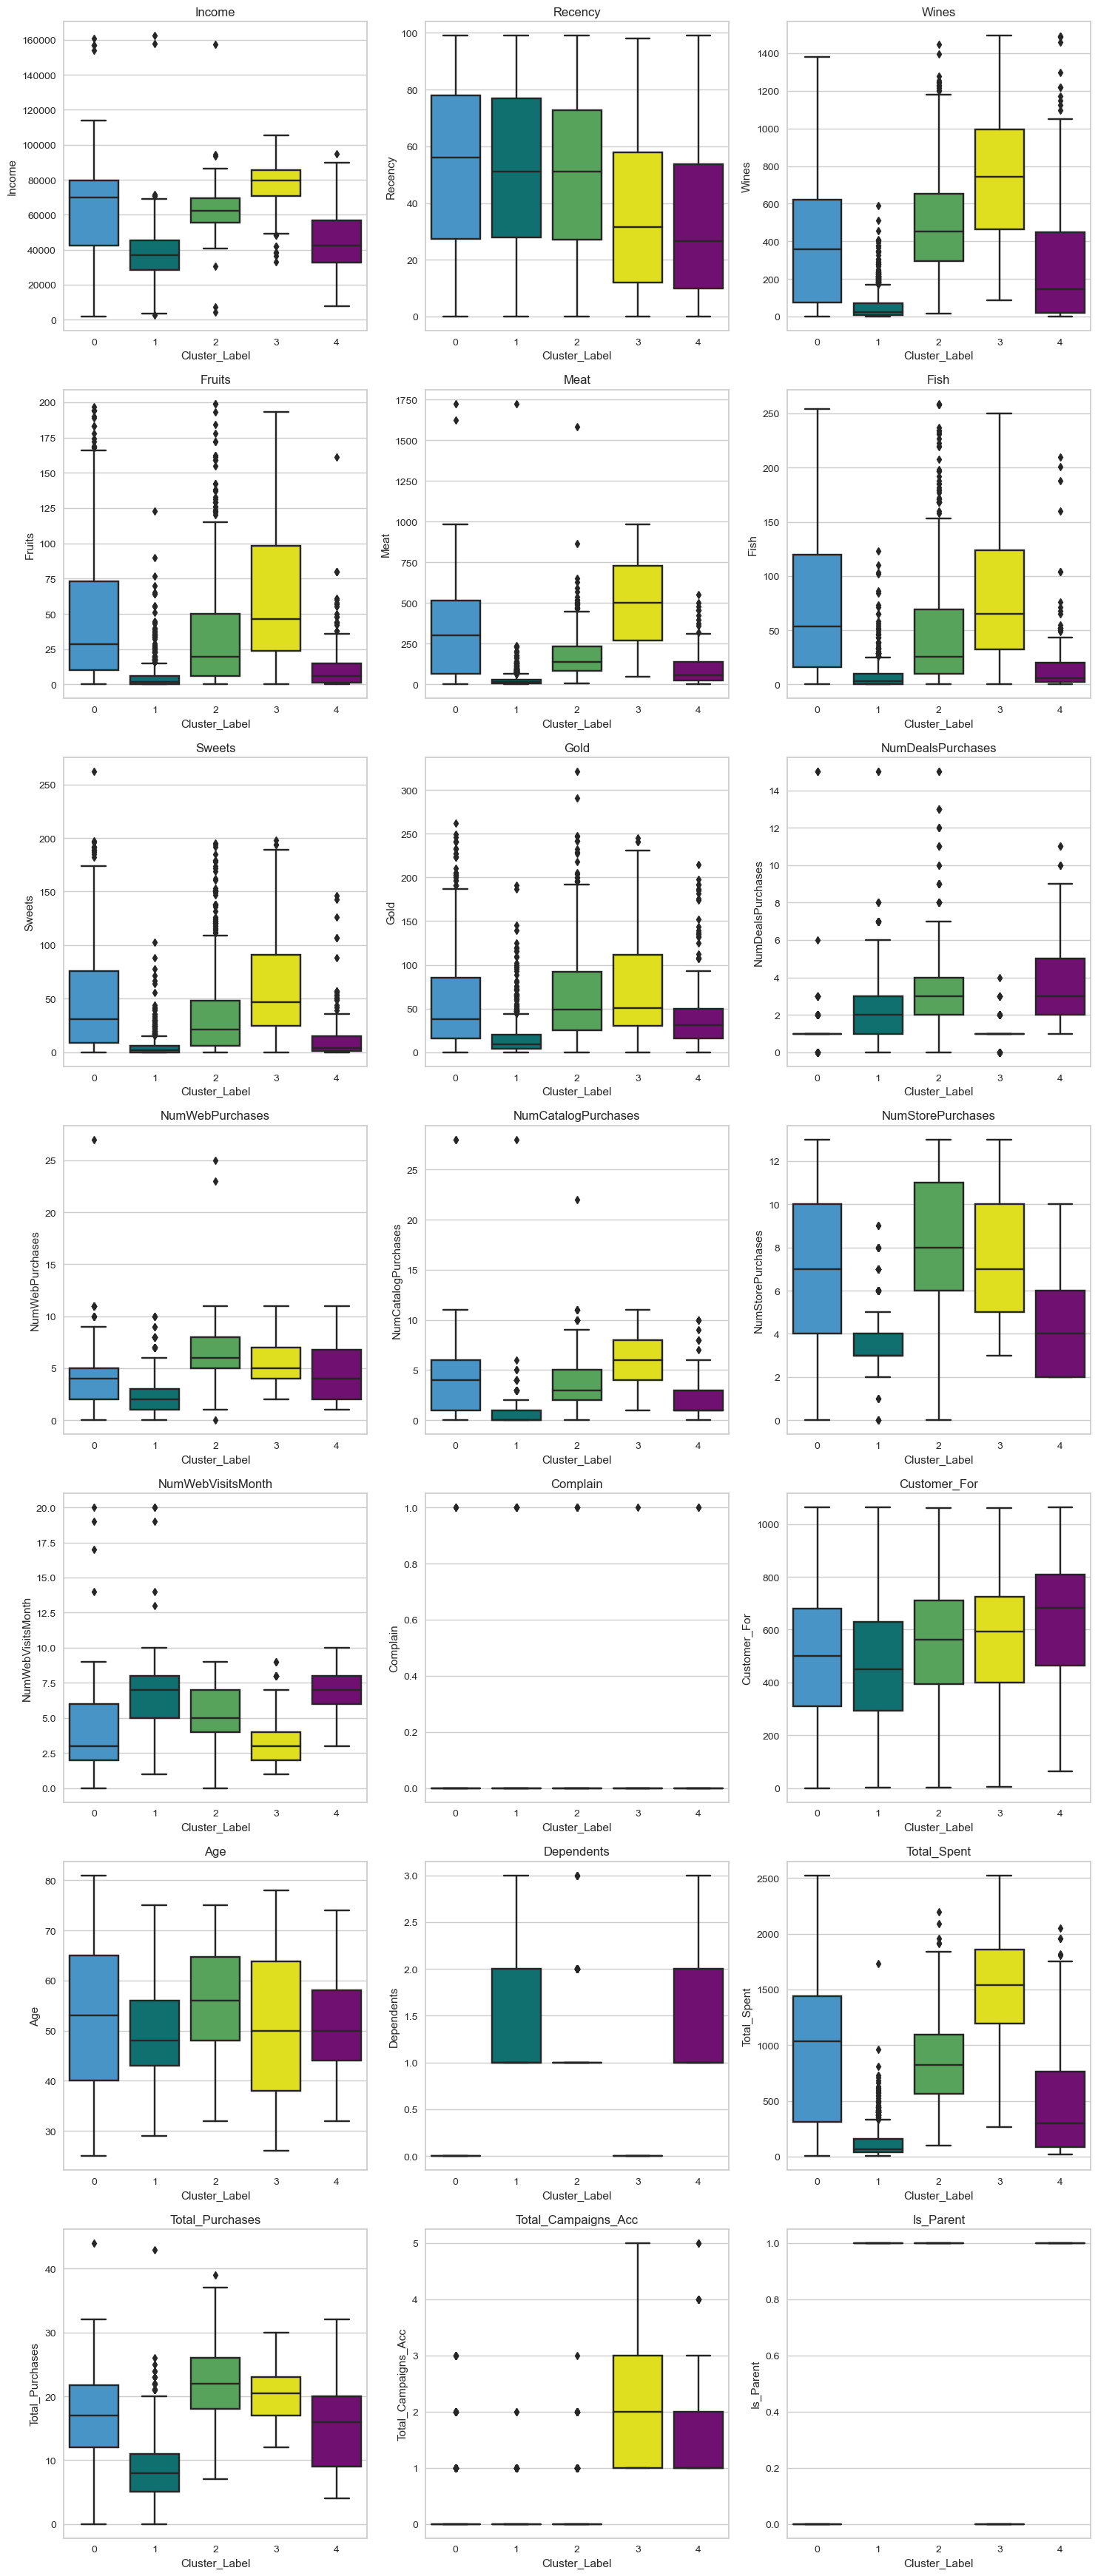

In [23]:
# Set up a grid for subplots
num_plots = len(df.columns) - 2
num_cols = 3 
num_rows = 7

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Counter for the actual plots (excluding 'ACCOUNT_ID' and 'Cluster_Label')
plot_counter = 0

for i, feature in enumerate(df.columns):
    if feature not in ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'complain', 'Response', 'Cluster_Label', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
        sns.boxplot(x='Cluster_Label', y=feature, data=df, ax=axes[plot_counter], palette=colours)
        axes[plot_counter].set_title(feature)
        plot_counter += 1

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

***Section 7: Profiling***

Cluster 0:
- Are not parents
- High income group
- Second highest spending group
- Relatively older
- Customer largely for groceries: fish, meat, fruits

Cluster 1:
- Are parents
- Relatively younger
- Lowest spending group
- Lowest income

Cluster 2:
- Are parents
- Relatively higher age
- Mid income group
- Mid spend group
- Highest total purchases - suggests many purchases of lower cost
- Highest deals purchased - could be related to the lower cost

Cluster 3:
- Are not parents
- Highest income
- Highest spending group
- Customer largely for groceries and wines

Cluster 4:
- Are parents
- Lower end of spending
- Lower end of income
- Mid range age group


***Section 8: Conclusion***

In this project, I employed unsupervised clustering techniques, starting with dimensionality reduction and subsequently applying agglomerative clustering. The outcome yielded five distinct clusters, which were then utilised to profile customers based on their spending habits, family compositions, and income/spending patterns. These insights can serve as a valuable foundation for devising more targeted and effective marketing strategies.